In [1]:
import seaborn as sns
import pandas as pd  #Using these imports that are the necessary libraries to start with the EDA
import warnings
warnings.filterwarnings("ignore")

In [2]:
luas_df = pd.read_csv('luas.csv') # Using pandas to read our data and transforming it into a dataframe

In [3]:
luas_df.head()#First thing to do is to visualise our df

STATISTIC Statistic Label  TLIST(A1)  Year C01885V02316     Month    UNIT  \
0  TOA11C01        Red line       2018  2018           01   January  Number   
1  TOA11C01        Red line       2018  2018           02  February  Number   
2  TOA11C01        Red line       2018  2018           03     March  Number   
3  TOA11C01        Red line       2018  2018           04     April  Number   
4  TOA11C01        Red line       2018  2018           05       May  Number   

     VALUE  
0  1664495  
1  1657562  
2  1661098  
3  1794424  
4  1934553

In [4]:
luas_df.info() #using .info to see the content of the data frame, useful to identify my nulls, types, and names of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATISTIC        195 non-null    object
 1   Statistic Label  195 non-null    object
 2   TLIST(A1)        195 non-null    int64 
 3   Year             195 non-null    int64 
 4   C01885V02316     195 non-null    object
 5   Month            195 non-null    object
 6   UNIT             195 non-null    object
 7   VALUE            195 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.3+ KB


In [5]:
##Following step is to drop irrelevat data and assign proper names to variables

In [6]:
luas_df = luas_df.rename(columns={"VALUE": 'Passengers Luas' })

In [7]:
luas_df.drop(luas_df[luas_df['Statistic Label'] == 'Red line'].index, axis=0, inplace=True) 

In [8]:
luas_df.drop(luas_df[luas_df['Statistic Label'] == 'Green line'].index, axis=0, inplace=True) 

In [9]:
luas_df.drop(luas_df[luas_df['Month'] == 'All months'].index, axis=0, inplace=True) 

In [10]:
luas_df.drop(columns=['STATISTIC'], inplace=True)

In [11]:
luas_df.drop(columns=['TLIST(A1)'], inplace=True)

In [12]:
luas_df.drop(columns=['UNIT'], inplace=True)

In [13]:
luas_df.drop(columns=['C01885V02316'], inplace=True)

In [14]:
luas_df.drop(columns=['Statistic Label'], inplace=True) 

In [15]:
tren_df = pd.read_excel('ETUP_GDL_T1.xlsx', sheet_name='Tabulado', skiprows=[0, 1, 2,64,65,66,67,68,69,70,71,72,73,74,75])

In [16]:
tren_df = tren_df.rename(columns={"Año": 'Year' })

In [17]:
tren_df = tren_df.rename(columns={"Mes": 'Month' })

In [18]:
print(tren_df.columns)

Index(['Ciudad', 'Year', 'Month',
       'Pasajeros transportados (Miles de  pasajeros)',
       'Ingresos por pasaje (Miles de pesos)'],
      dtype='object')


In [19]:
tren_df['Passengers Tren'] = tren_df['Pasajeros transportados (Miles de  pasajeros)'] 

In [20]:
luas_df.shape #using .shape to see the size of my df, the rows and columns.

(60, 3)

In [21]:
tren_df.head()

Ciudad  Year    Month  Pasajeros transportados (Miles de  pasajeros)  \
0  Guadalajara  2018    Enero                                         8287.8   
1  Guadalajara  2018  Febrero                                         8033.9   
2  Guadalajara  2018    Marzo                                         8441.4   
3  Guadalajara  2018    Abril                                         8315.5   
4  Guadalajara  2018     Mayo                                         8899.0   

   Ingresos por pasaje (Miles de pesos)  Passengers Tren  
0                               41846.1           8287.8  
1                               39811.3           8033.9  
2                               42917.6           8441.4  
3                               45080.9           8315.5  
4                               48710.0           8899.0

In [22]:
tren_df['Revenue Tren'] = round (tren_df['Ingresos por pasaje (Miles de pesos)'] / 18.7,2) 
#Since the numbers are in mexican pesos I converted them to Euros and round them

In [23]:
tren_df.drop(columns=['Pasajeros transportados (Miles de  pasajeros)'], inplace=True)

In [24]:
tren_df.drop(columns=['Ingresos por pasaje (Miles de pesos)'], inplace=True)

In [25]:
tren_df.drop(columns=['Ciudad'], inplace=True)

In [26]:
tren_df['Year'] = tren_df['Year'].astype('category') #Changing the type of data for my column

In [27]:
luas_df['Year'] = luas_df['Year'].astype('category')


In [28]:
tren_df['Month'] = tren_df['Month'].replace({
    'Enero': 'January',
    'Febrero': 'February',
    'Marzo': 'March',
    'Abril': 'April',
    'Mayo': 'May',
    'Junio': 'June',
    'Julio': 'July',
    'Agosto': 'August',
    'Septiembre': 'September',
    'Octubre': 'October',
    'Noviembre': 'November',
    'Diciembre': 'December'
}) #Using replace to translate from spanish to english

In [29]:
tren_df.head() #verifying everything was done correctly

Year     Month  Passengers Tren  Revenue Tren
0  2018   January           8287.8       2237.76
1  2018  February           8033.9       2128.95
2  2018     March           8441.4       2295.06
3  2018     April           8315.5       2410.74
4  2018       May           8899.0       2604.81

In [30]:
luas_df['Passengers Luas'] =round( luas_df['Passengers Luas'] / 1000,2) 
#Also, since the Tren Ligero df was expressed in thousands I converted the numbers in the Luas df

In [31]:
transport_df = pd.merge(luas_df, tren_df, how='outer')

In [32]:
tren_df.head()

Year     Month  Passengers Tren  Revenue Tren
0  2018   January           8287.8       2237.76
1  2018  February           8033.9       2128.95
2  2018     March           8441.4       2295.06
3  2018     April           8315.5       2410.74
4  2018       May           8899.0       2604.81

In [33]:
luas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 130 to 193
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Year             60 non-null     category
 1   Month            60 non-null     object  
 2   Passengers Luas  60 non-null     float64 
dtypes: category(1), float64(1), object(1)
memory usage: 1.7+ KB


In [34]:
transport_df.head()

Year     Month  Passengers Luas  Passengers Tren  Revenue Tren
0  2018   January          3218.65           8287.8       2237.76
1  2018  February          3118.29           8033.9       2128.95
2  2018     March          3097.57           8441.4       2295.06
3  2018     April          3350.06           8315.5       2410.74
4  2018       May          3622.34           8899.0       2604.81

In [35]:
transport_df['Month'] = transport_df['Month'].astype('category')

In [36]:
#From here descriptive statistics were obtained to help us understand our dataset

In [37]:
mean_luas = transport_df['Passengers Luas'].sum() / len(transport_df['Passengers Luas'])
mean_tren = transport_df['Passengers Tren'].sum() / len(transport_df['Passengers Tren'])
mean_revenue = transport_df['Revenue Tren'].sum() / len(transport_df['Revenue Tren'])
print(mean_luas,mean_tren,mean_revenue)
mean_luas_pd = transport_df['Passengers Luas'].mean()
mean_tren_pd = transport_df['Passengers Tren'].mean()
mean_revenue_pd = transport_df['Revenue Tren'].mean()
print(mean_luas_pd,mean_tren_pd,mean_revenue_pd)

2791.8235 8813.128333333332 2036.6418333333334
2791.8235 8813.128333333332 2036.6418333333334


In [38]:
median_luas = transport_df['Passengers Luas'].median()
median_tren = transport_df['Passengers Tren'].median()
median_revenue = transport_df['Revenue Tren'].median()

print(median_luas, median_tren, median_revenue)

3201.99 8639.4 1795.0900000000001


In [39]:
from scipy import stats

mode_luas=stats.mode(transport_df['Passengers Luas'])
mode_tren=stats.mode(transport_df['Passengers Tren'])
mode_revenue=stats.mode(transport_df['Revenue Tren'])

print(mode_luas, mode_tren, mode_revenue)

ModeResult(mode=array([228.63]), count=array([1])) ModeResult(mode=array([3032.]), count=array([1])) ModeResult(mode=array([972.84]), count=array([1]))


In [40]:
std_luas = transport_df['Passengers Luas'].std()
std_tren = transport_df['Passengers Tren'].std()
std_revenue = transport_df['Revenue Tren'].std()

print(std_luas,std_tren, std_revenue)

1226.6140153599147 2061.682110094066 446.75180873550624


In [41]:
min_luas = transport_df['Passengers Luas'].min()
min_tren = transport_df['Passengers Tren'].min()
min_revenue = transport_df['Revenue Tren'].min()

print(min_luas,min_tren, min_revenue)

228.63 3032.0 972.84


In [42]:
max_luas = transport_df['Passengers Luas'].max()
max_tren = transport_df['Passengers Tren'].max()
max_revenue = transport_df['Revenue Tren'].max()

print(max_luas,max_tren, max_revenue)

4502.32 12762.7 2721.75


In [43]:
missing_data = transport_df.isnull().sum()

missing_data


Year               0
Month              0
Passengers Luas    0
Passengers Tren    0
Revenue Tren       0
dtype: int64

In [44]:
duplicate_rows = transport_df.duplicated()
duplicate_rows.sum()

0

## Data Visualization

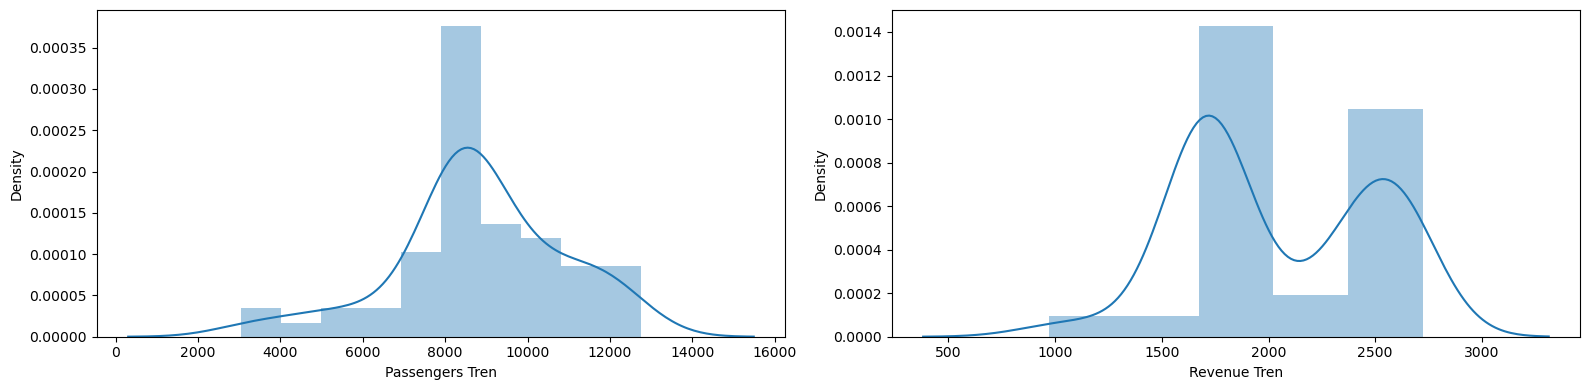

In [45]:
#This visualation was used to explore of central tendencies and variations within the dataset 

import matplotlib.pyplot as plt

rows = 1
cols = 2  

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4))

col = ['Passengers Tren', 'Revenue Tren']
index = 0
for i in range(cols):
    sns.distplot(transport_df[col[i]], ax=ax[i])
    index +=1 

plt.tight_layout()

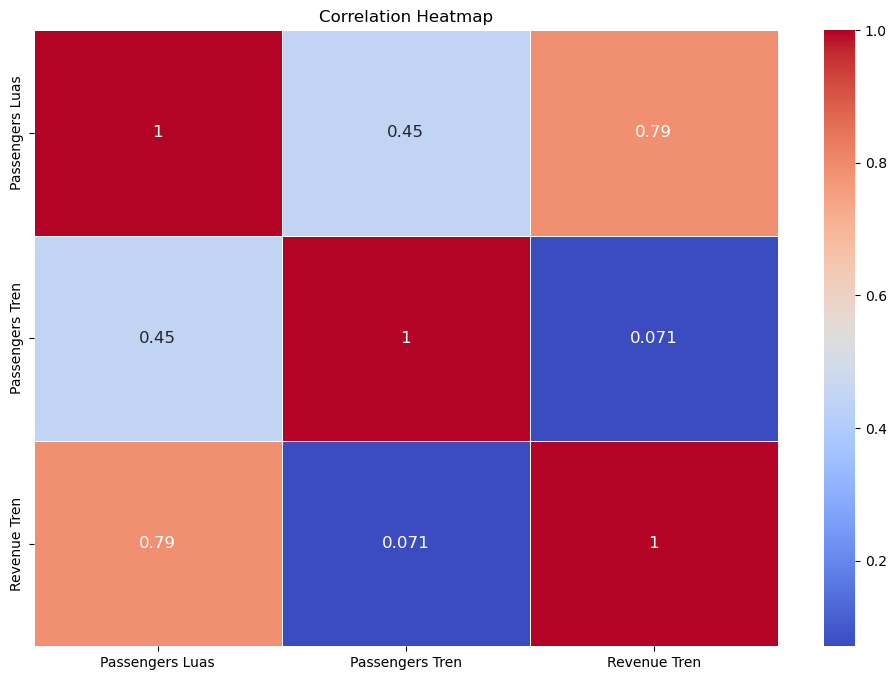

In [46]:
#This heatmap was created to be able to comprenhed visually the relationships between out variables and so
#identify the key factors wthin the transportation trend

fig , ax = plt.subplots(figsize=(12, 8))
corrdat = transport_df.corr()
sns.heatmap(corrdat, annot=True, annot_kws={'size': 12}, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [47]:
X = transport_df[['Passengers Tren']]
y = transport_df['Revenue Tren']

## Linear Regression

In [48]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-527870.66994451


## Ridge Regression

In [49]:
#This model was applied using GridSearchCV to get the best hyperparameter and so predict the Revenue Tren based 
#on the Passengers Tren. The best parameter and the best score were displayed.
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [50]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-527870.3853310726


## Lasso Regression

In [51]:
#Practically the same process from Ridge Regression, Lasso regression was applied using GridSearchCV 
#to get the best hyperparameter and so predict the Revenue Tren based on the Passengers Tren. 
#The best parameter and the best score were displayed.
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
-527763.3877586559


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

<Axes: xlabel='Revenue Tren', ylabel='Density'>

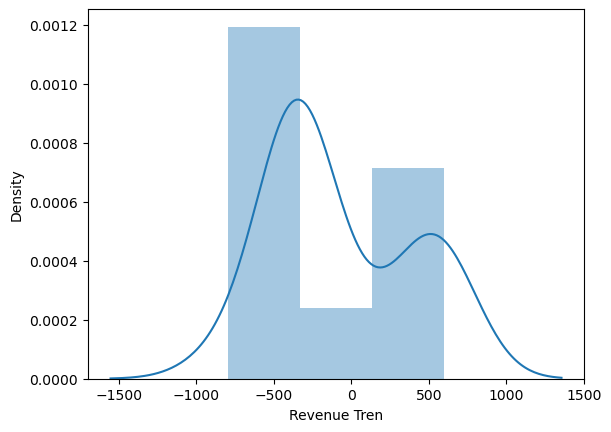

In [54]:
sns.distplot(y_test-prediction_lasso)

<Axes: xlabel='Revenue Tren', ylabel='Density'>

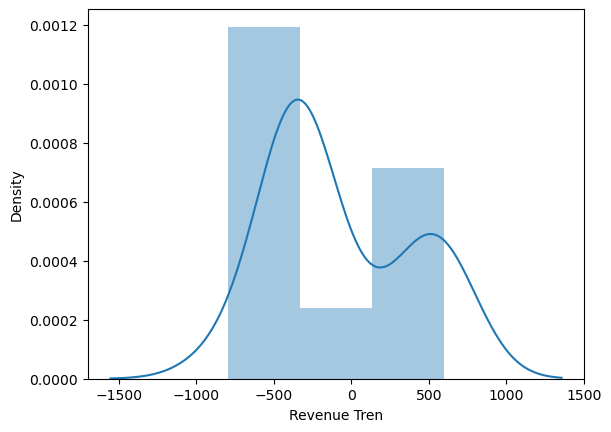

In [55]:
sns.distplot(y_test-prediction_ridge)

##confidence interval

In [56]:
transport_df.head()

Year     Month  Passengers Luas  Passengers Tren  Revenue Tren
0  2018   January          3218.65           8287.8       2237.76
1  2018  February          3118.29           8033.9       2128.95
2  2018     March          3097.57           8441.4       2295.06
3  2018     April          3350.06           8315.5       2410.74
4  2018       May          3622.34           8899.0       2604.81

In [57]:
#It is intended to find the confidence interval for the population 
#proportion of passengers using the Tren Ligero in Guajajara. It was used a calculation 
#of 95 % confidence interval for the mean of the variable ‘Passengers Tren’ in the dataset.
import scipy.stats as st


data = transport_df['Passengers Tren']

#create 95% confidence interval for population 
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))



(8291.46036807964, 9334.796298587024)


## Mann-Whitney U Test

In [58]:
#this non parametric test was used to compare the differences between two samples of 
#independent variables (Passengers Tren and Passengers Luas)
import scipy.stats as stats

stats.mannwhitneyu(transport_df['Passengers Tren'], transport_df['Passengers Luas'], alternative='two-sided')

MannwhitneyuResult(statistic=3546.0, pvalue=5.11813280634539e-20)


## Ttest ind

In [59]:
#the indepentent T-test is a parametric test performed to 
#test for a statistically significant difference in the means between 2 
#independent groups, Passengers Tren and Passengers Luas.
stats.ttest_ind(transport_df['Passengers Tren'],
                transport_df['Passengers Luas'])

Ttest_indResult(statistic=19.441923675856394, pvalue=1.3526073942665427e-38)

## One way Anova

In [60]:
#Anova facilitates finding out if the differences between datasets are statistically significant. 
#The way it performs is  analysing the levels of variance within the datasets through samples taken 
#from each of them. The one way ANOVA shows if there are significant differences between the means of 
#independent variables.
from scipy.stats import f_oneway
performance1=transport_df['Passengers Tren']
performance2=transport_df['Passengers Luas']

f_oneway(performance1,performance2)

F_onewayResult(statistic=377.9883962178252, pvalue=1.3526073942665918e-38)



## Friedman test

In [61]:
#the Friedman Test is a non-parametric inferential statistical techniques performed to dictate whether 
#or not there is a statistically significant difference among the means of three or more groups
from scipy import stats

group1 = transport_df['Passengers Luas']
group2= transport_df['Passengers Tren']
group3 = transport_df['Revenue Tren']
stats.friedmanchisquare(group1, group2, group3)

FriedmanchisquareResult(statistic=98.5333333333333, pvalue=4.0156747043758824e-22)

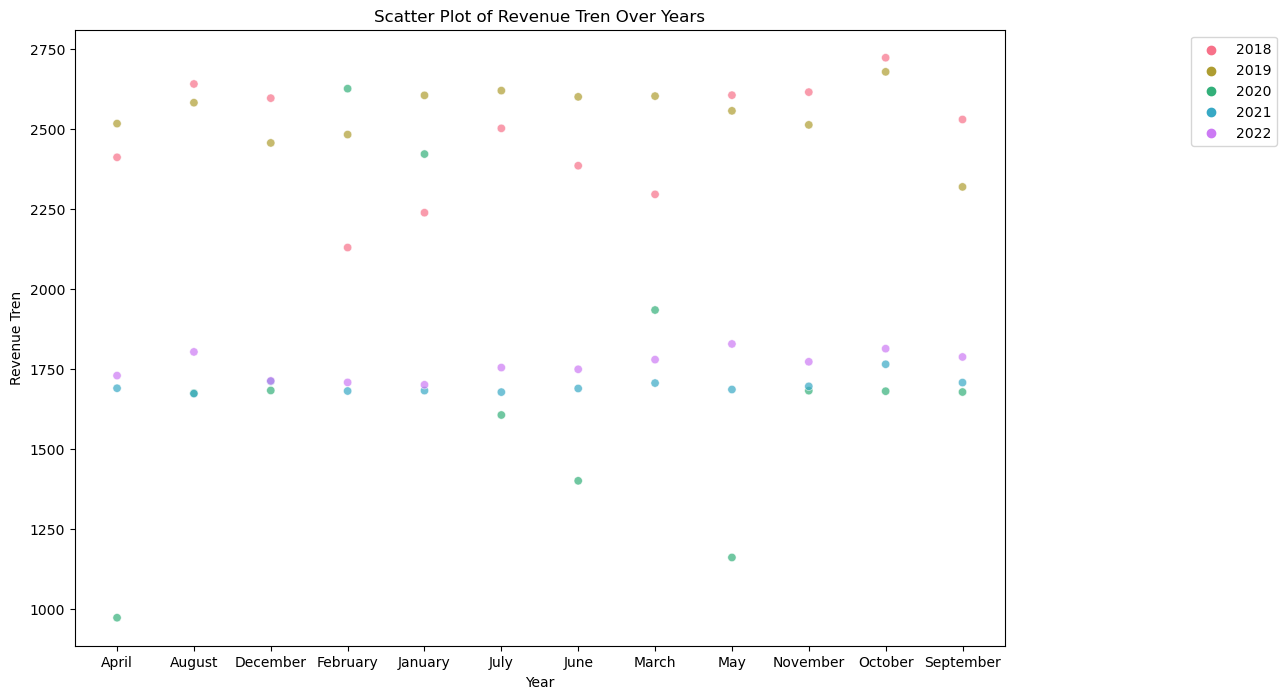

In [62]:
import matplotlib.pyplot as plt
sns.set_palette(['#62C370', '#FFD166', '#EF476F'])


plt.figure(figsize=(12, 8))
sns.scatterplot(data=transport_df, x='Month', y='Revenue Tren', alpha=0.7, hue='Year')


plt.title('Scatter Plot of Revenue Tren Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue Tren')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))




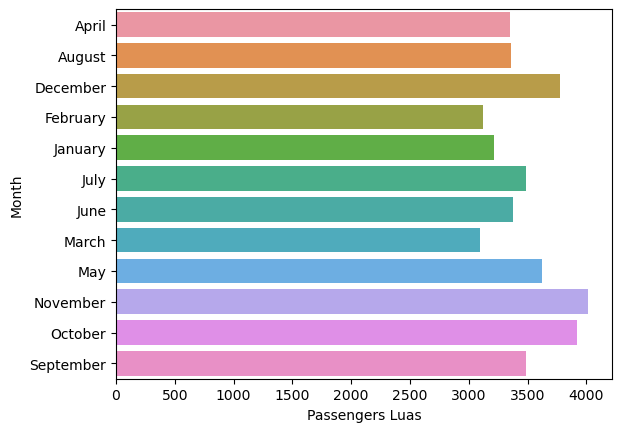

In [63]:
sns.barplot(x='Passengers Luas', y='Month', data=transport_df[transport_df['Year'] == 2018])

figsize=(12, 6)

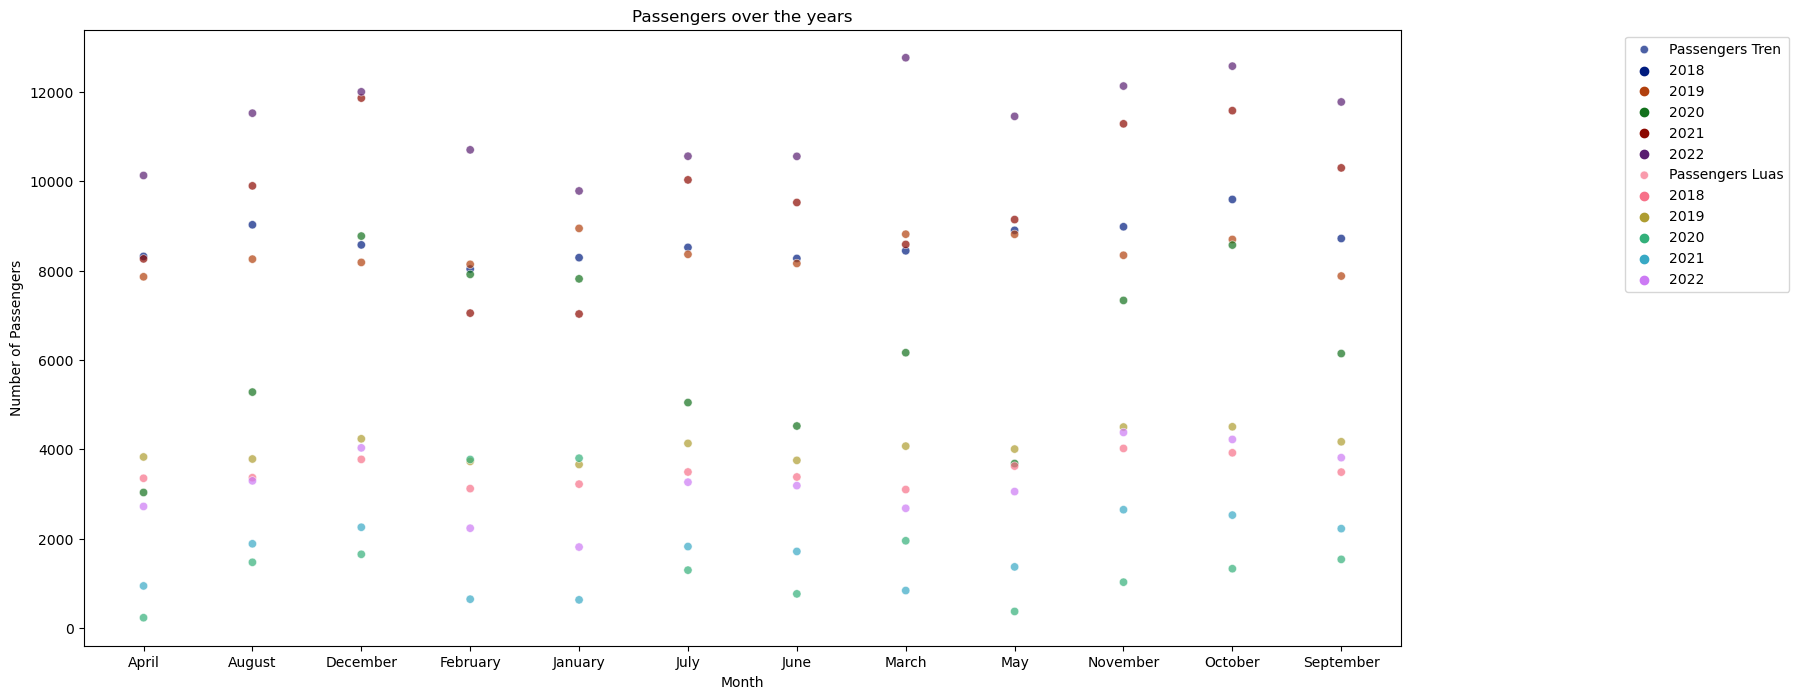

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(17, 8))
sns.scatterplot(data=transport_df, x='Month', y='Passengers Tren', alpha=0.7, hue='Year', palette='dark', label='Passengers Tren')
sns.scatterplot(data=transport_df, x='Month', y='Passengers Luas', alpha=0.7, hue='Year', palette='husl', label='Passengers Luas')


plt.title('Passengers over the years')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))



<Axes: xlabel='Year'>

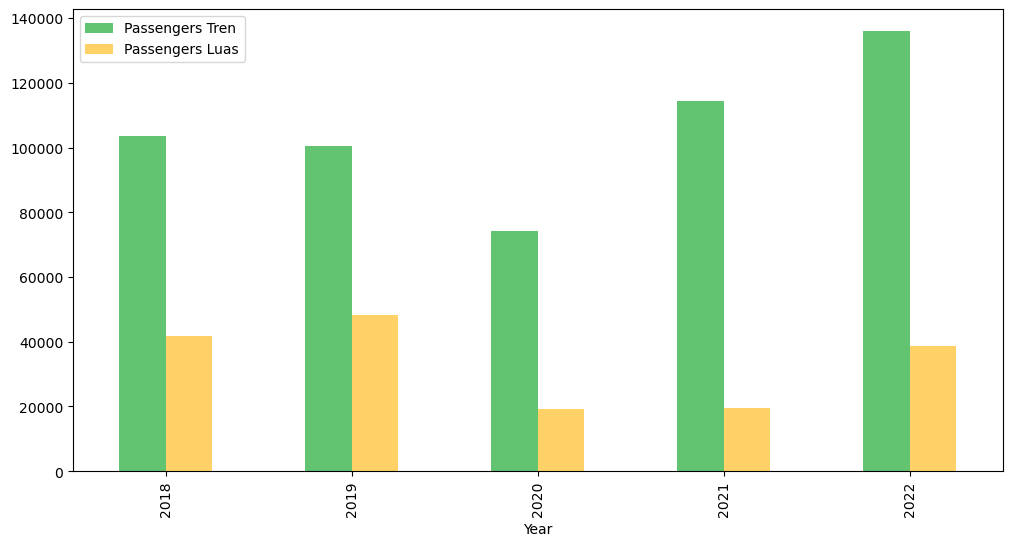

In [65]:
passengers_df = transport_df.groupby('Year')[['Passengers Tren', 'Passengers Luas']].sum()


passengers_df.plot(kind='bar', figsize=(12, 6))

<Axes: xlabel='Year', ylabel='Passengers Luas'>

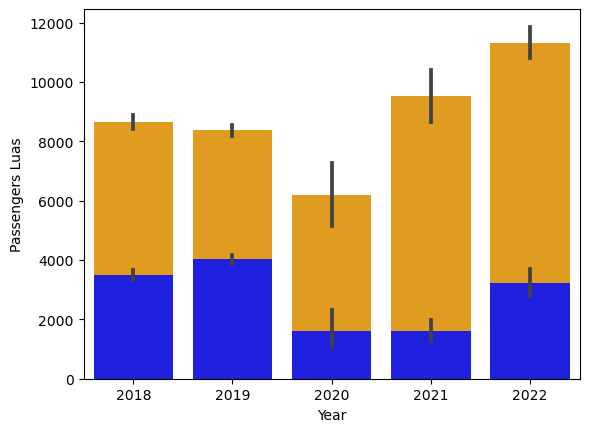

In [66]:
sns.barplot(x='Year', y='Passengers Tren', data=transport_df, color='orange', label='Passengers Tren')
sns.barplot(x='Year', y='Passengers Luas', data=transport_df, color='blue', label='Passengers Luas')

# Bar plot for Passengers Tren


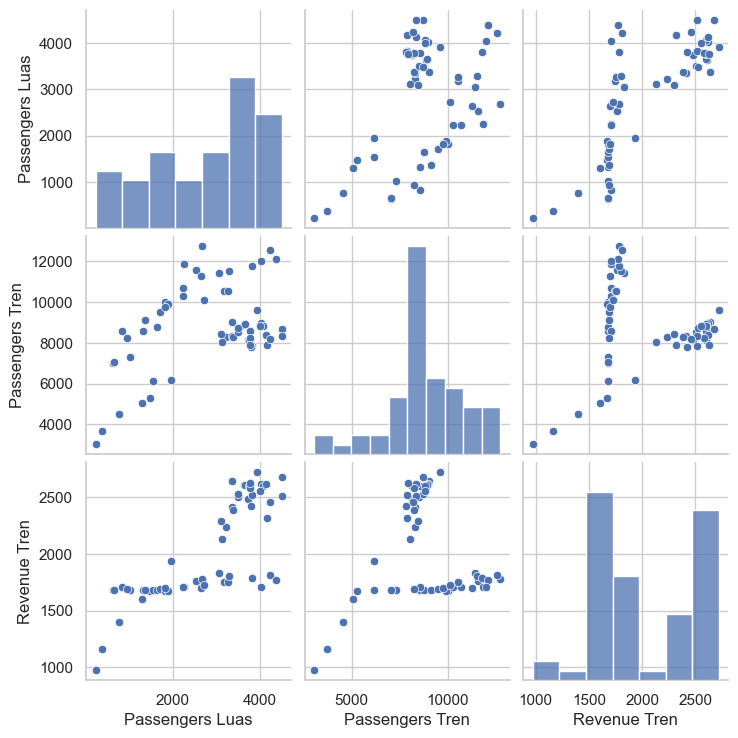

In [67]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style="whitegrid")
pair_plot = sns.pairplot(transport_df)




Text(0.5, 1.0, 'Passengers Over Time')

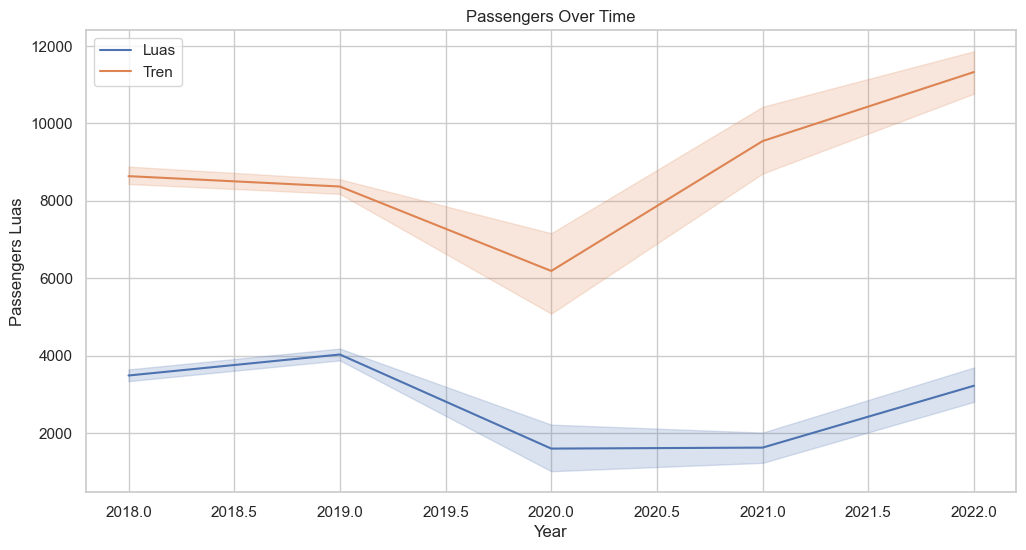

In [68]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Passengers Luas', data=transport_df, label='Luas')
sns.lineplot(x='Year', y='Passengers Tren', data=transport_df, label='Tren')
plt.title('Passengers Over Time')

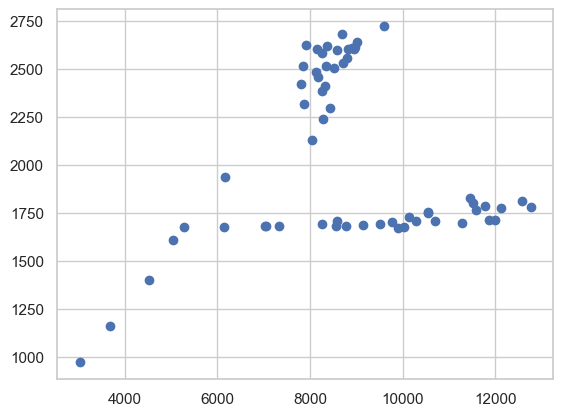

In [69]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


X = transport_df['Passengers Tren'].values.reshape(-1, 1)
y = transport_df['Revenue Tren']
plt.scatter(X,y)


Text(0, 0.5, 'Revenue')

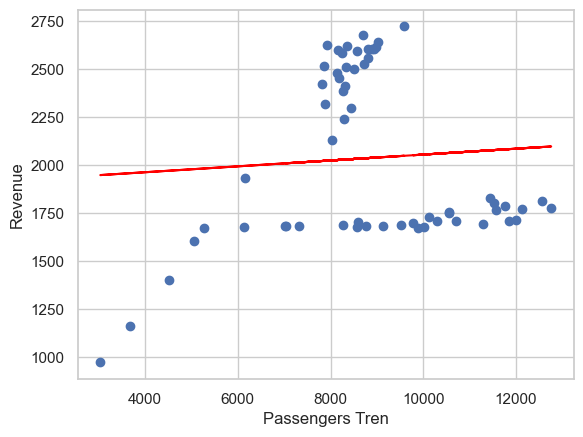

In [70]:
#A simple linear regression was also applied to view the relationship between Passengers Tren and Revenue Tren. 
#The performance was evaluated showing the predicted and actual values.
model = LinearRegression().fit(X, y)


yfit = model.predict(X)


plt.scatter(transport_df['Passengers Tren'], y)
plt.plot(transport_df['Passengers Tren'], yfit, color='red')


plt.xlabel('Passengers Tren')
plt.ylabel('Revenue')



In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(transport_df['Passengers Tren'].values.reshape(-1, 1))



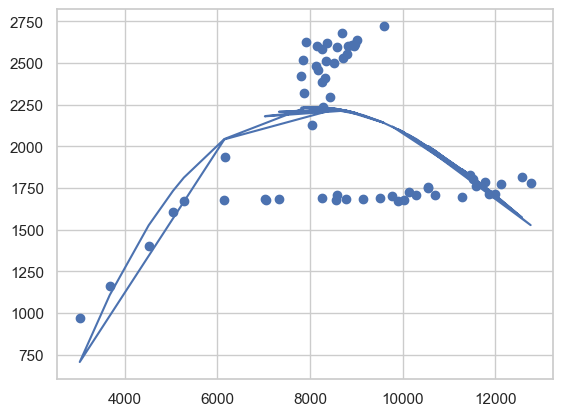

In [72]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(transport_df['Passengers Tren'], y, label='Original Data')
plt.plot(transport_df['Passengers Tren'], yfit);

In [73]:
import altair as alt

alt.Chart(transport_df).mark_point(filled=True).encode(
    alt.X('Passengers Tren', scale=alt.Scale(zero=False)),
    alt.Y('Month', scale=alt.Scale(zero=False)),
    alt.Size('Revenue Tren'),  
    alt.Color('Year'),
    alt.OpacityValue(0.5)
)
#Altair was used to facilitate the understanding of the trends in our transportation data since it is and interactive
#way to visualize and explore the relationship among the passergers, revenue and time.
 

alt.Chart(...)

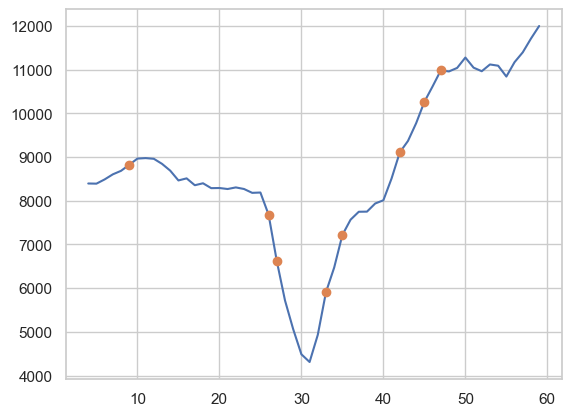

In [74]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
import numpy as np

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig)  
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if not highlight.empty:
        highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Passengers Tren', window=5, sigma=2, view_fn=mpl_plot):
    avg = transport_df[variable].rolling(window=window).mean()
    residual = transport_df[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])


find_outliers(variable='Passengers Tren')


Column
    [0] Column
        [0] IntSlider(end=15, name='window', start=-5, value=5)
        [1] IntSlider(end=6, name='sigma', start=-2, value=2)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00113')
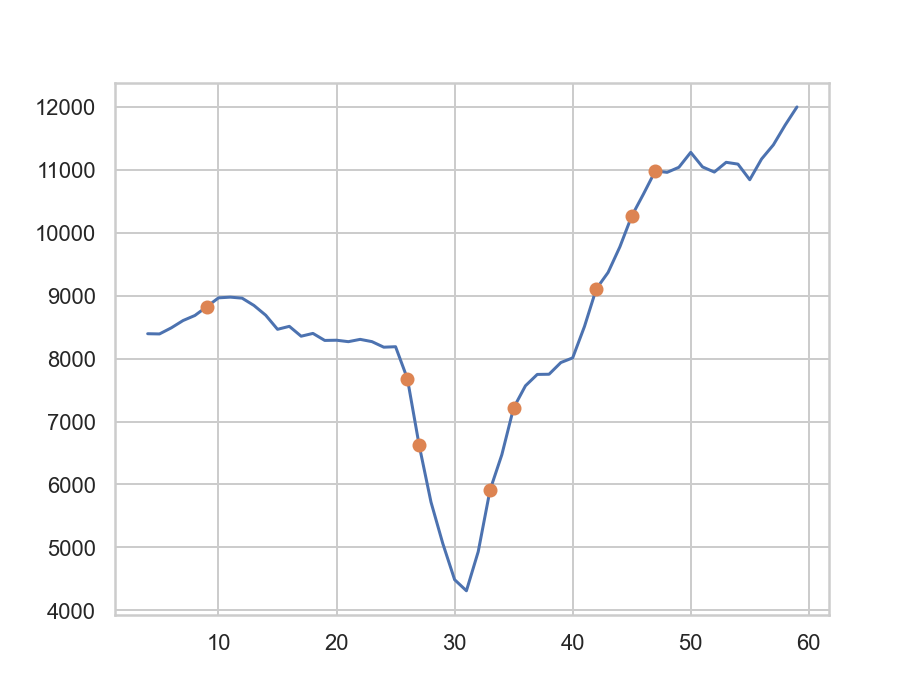

In [75]:
import panel as pn
pn.extension()

pn.interact(find_outliers)


In [76]:
kw = dict(window=(1, 60), variable=['Passengers Luas', 'Passengers Tren', 'Revenue Tren'], sigma=(1, 20))
i = pn.interact(find_outliers, **kw)
i.pprint()

Column
    [0] Column
        [0] Select(name='variable', options=['Passengers Luas', ...], value='Passengers Tren')
        [1] IntSlider(end=60, name='window', start=1, value=5)
        [2] IntSlider(end=20, name='sigma', start=1, value=2)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00150')


/var/folders/nh/kg3q1l5x6blgvx9_pfh2qghm0000gn/T/ipykernel_37729/2555789313.py:3: PanelDeprecationWarning: 'Column.pprint' is deprecated and will be removed in version 1.3, use 'print' instead.
  i.pprint()


In [77]:
import hvplot.pandas

def hvplot(avg, highlight):
    return avg.hvplot(height=200) * highlight.hvplot.scatter(color='orange', padding=0.1)

text2 = "## PASSENGERS IN LUAS (IRELAND) AND TREN LIGERO(MEXICO) \nSelect the variable and the smoothing values"
hvp   = pn.interact(find_outliers, view_fn=hvplot, **kw)
pn.Column(pn.Row(pn.panel(text2, width=400), hvp[0]), hvp[1]).servable("Passengers Luas")
#Panel visualization was used to provide interactivity and let user control and explore the variables. 

Column
    [0] Row
        [0] Markdown(str, width=400)
        [1] Column
            [0] Select(name='variable', options=['Passengers Luas', ...], value='Passengers Tren')
            [1] IntSlider(end=60, name='window', start=1, value=5)
            [2] IntSlider(end=20, name='sigma', start=1, value=2)
    [1] Row(sizing_mode='fixed')
        [0] HoloViews(Overlay, height=200, name='interactive00862', sizing_mode='fixed', width=700)

In [78]:
!pip install praw

In [79]:
import praw
import pandas as pd
from datetime import datetime as dt
from dotenv import load_dotenv
from os import getenv

In [80]:
load_dotenv()#Using this to protect our credentials

True

In [81]:
reddit = praw.Reddit(
    client_id=getenv("APP_ID"), 
    client_secret=getenv("APP_SECRET"), 
    user_agent= getenv('REDDIT_USERNAME'), 
)

In [82]:
print(reddit.read_only)

True


In [83]:
subreddit = reddit.subreddit("Ireland")

In [84]:
#The PRAW library was used with the Reddit API to find comments about the Luas 
#transport from the subreddit Dublin and they are passed to a df called comments_df. 

In [85]:
def find_comments(search_query):
    comments_list = []
    try:
        for submission in reddit.subreddit("Dublin").search(search_query, sort="new", limit=11):

            for comment in submission.comments.list():
                comments_list.append({
                    'Submission Title': submission.title,
                    'Comment Body': comment.body            })
    except :
        print("No data found")
    return comments_list


search_query = "Public Transport"
comments_list = find_comments(search_query)
comments_df = pd.DataFrame(comments_list)


In [86]:
#A challenge was faced here since there was not knowledge for how to get comments from a topic inside 
#a subreddit. As learnt in class, the way to get comments from subreddits was taught but for the purpose of 
#this sentiment analysis more information was required and it was achieved thank to a python website that had a 
#function well explained and very similar to what this project needed

In [87]:
comments_df.head()

Submission Title  \
0  Where to stay & getting around   
1  Where to stay & getting around   
2  Where to stay & getting around   
3  Where to stay & getting around   
4  Where to stay & getting around   

                                        Comment Body  
0  3 arena is easy to get to, the luas will get y...  
1  The Gibson hotel is straight across from the 3...  
2  You could stay at the Red Cow Hotel. The Luas ...  
3  That sounds perfect, Thanks! Do you need a spe...  
4  You can pay by cash or card, you buy your tick...

In [88]:
comments_df.to_csv("Analysis.csv", index=False)

In [89]:
comments_df = pd.read_csv("Analysis.csv",encoding='ISO-8859-1')

In [90]:
comments_df.head(8)

Submission Title  \
0  Where to stay & getting around   
1  Where to stay & getting around   
2  Where to stay & getting around   
3  Where to stay & getting around   
4  Where to stay & getting around   
5      public transportation app?   
6      public transportation app?   
7      public transportation app?   

                                        Comment Body  
0  3 arena is easy to get to, the luas will get y...  
1  The Gibson hotel is straight across from the 3...  
2  You could stay at the Red Cow Hotel. The Luas ...  
3  That sounds perfect, Thanks! Do you need a spe...  
4  You can pay by cash or card, you buy your tick...  
5  Transit app is pretty good.\n\nGoogle Maps use...  
6  TFI Live app is the best for myself (covers al...  
7  Iâve started using Transit as I find the TFI...

In [91]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Submission Title  264 non-null    object
 1   Comment Body      264 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


In [92]:
comments_df = comments_df.drop_duplicates()

In [93]:
from textblob import TextBlob

In [94]:
comments_df['Sentiment'] = comments_df['Comment Body'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [95]:
comments_df['Polarity_Rating'] = comments_df['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [96]:

import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mendoza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: xlabel='Polarity_Rating', ylabel='count'>

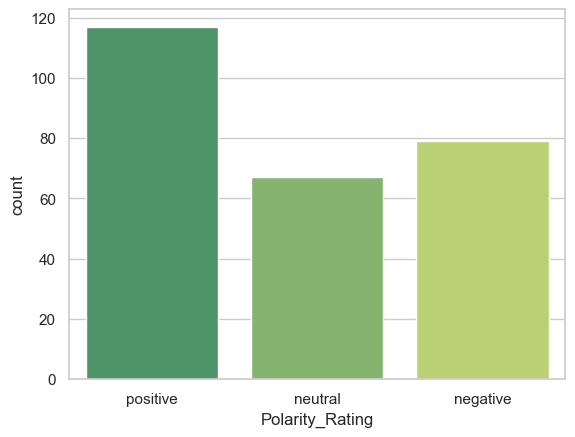

In [97]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=comments_df, palette='summer')

In [98]:
comments_df_Positive = comments_df[comments_df['Polarity_Rating'] == 'positive']
comments_df_Neutral = comments_df[comments_df['Polarity_Rating'] == 'neutral']
comments_df_Negative = comments_df[comments_df['Polarity_Rating'] == 'negative']

In [99]:
print(comments_df_Neutral)

                   Submission Title  \
4    Where to stay & getting around   
10       public transportation app?   
17                        Taxi help   
21                        Taxi help   
28                        Taxi help   
..                              ...   
257                Public transport   
258                Public transport   
259                Public transport   
262                Public transport   
263                Public transport   

                                          Comment Body  Sentiment  \
4    You can pay by cash or card, you buy your tick...        0.0   
10           Google maps has a public transport option        0.0   
17                    Phone up a taxi company and book        0.0   
21   Thereâs Aircoach in talbot hotel around stil...        0.0   
28                            What day is your flight?        0.0   
..                                                 ...        ...   
257  Grab a Leap card and they're both covered f

In [100]:
#Oversampling was required for neutral and negative sentiments since it was imbalance
comments_df_Neutral_over = comments_df_Neutral.sample(122,replace=True)
comments_df_Negative_over = comments_df_Negative.sample(122,replace=True)
comments_df = pd.concat([comments_df_Positive, comments_df_Neutral_over, comments_df_Negative_over], axis=0)

In [101]:
counts = comments_df['Polarity_Rating'].value_counts()
counts

neutral     122
negative    122
positive    117
Name: Polarity_Rating, dtype: int64

In [102]:
#Text cleaning and Organizing was implemented removing stopwords, punctuation and then Neural Network, 
#part of Machine Learning was applied with early stopping to prevent overfitting. After that, the model 
#was trained and it achieved an acceptable Test Accuracy

In [103]:
from nltk.corpus import stopwords
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [104]:
comments_df['review'] = comments_df['Comment Body'].apply(get_text_processing)
comments_df.head()

Submission Title  \
0  Where to stay & getting around   
1  Where to stay & getting around   
2  Where to stay & getting around   
3  Where to stay & getting around   
5      public transportation app?   

                                        Comment Body  Sentiment  \
0  3 arena is easy to get to, the luas will get y...   0.266667   
1  The Gibson hotel is straight across from the 3...   0.350000   
2  You could stay at the Red Cow Hotel. The Luas ...   0.027778   
3  That sounds perfect, Thanks! Do you need a spe...   0.416667   
5  Transit app is pretty good.\n\nGoogle Maps use...   0.419143   

  Polarity_Rating                                             review  
0        positive  3 arena easy get luas get directly Dart gets w...  
1        positive  Gibson hotel straight across 3 Arena Lovely hotel  
2        positive  could stay Red Cow Hotel Luas minutes walk awa...  
3        positive  sounds perfect Thanks need specific pass luas ...  
5        positive  Transit app pretty good Google Maps used reaso...

In [105]:
comments_df = comments_df[['review', 'Polarity_Rating']]
comments_df.info

<bound method DataFrame.info of                                                 review Polarity_Rating
0    3 arena easy get luas get directly Dart gets w...        positive
1    Gibson hotel straight across 3 Arena Lovely hotel        positive
2    could stay Red Cow Hotel Luas minutes walk awa...        positive
3    sounds perfect Thanks need specific pass luas ...        positive
5    Transit app pretty good Google Maps used reaso...        positive
..                                                 ...             ...
105  huge risk Covid never went away Unfortunately ...        negative
135  Nah say People buses nasty winter mornings win...        negative
105  huge risk Covid never went away Unfortunately ...        negative
136  Absolutely lot places world preCovid considere...        negative
247  places city dire need yellow box camera worst ...        negative

[361 rows x 2 columns]>

In [106]:
one_hot = pd.get_dummies(comments_df["Polarity_Rating"])
comments_df.drop(['Polarity_Rating'],axis=1,inplace=True)
comments_df = pd.concat([comments_df,one_hot],axis=1)
comments_df.head()

review  negative  neutral  \
0  3 arena easy get luas get directly Dart gets w...         0        0   
1  Gibson hotel straight across 3 Arena Lovely hotel         0        0   
2  could stay Red Cow Hotel Luas minutes walk awa...         0        0   
3  sounds perfect Thanks need specific pass luas ...         0        0   
5  Transit app pretty good Google Maps used reaso...         0        0   

   positive  
0         1  
1         1  
2         1  
3         1  
5         1

In [107]:
X = comments_df['review'].values
y = comments_df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [108]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [109]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [110]:
model = Sequential()

model.add(Dense(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=70,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=40,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [111]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
1/1 [==============================] - 0s 324ms/step - loss: 1.1049 - accuracy: 0.2738 - val_loss: 1.0987 - val_accuracy: 0.3394
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0934 - accuracy: 0.3492 - val_loss: 1.0980 - val_accuracy: 0.3761
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 1.0982 - accuracy: 0.3571 - val_loss: 1.0974 - val_accuracy: 0.3761
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0954 - accuracy: 0.3730 - val_loss: 1.0968 - val_accuracy: 0.3670
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0927 - accuracy: 0.3452 - val_loss: 1.0962 - val_accuracy: 0.3761
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 1.0933 - accuracy: 0.3849 - val_loss: 1.0956 - val_accuracy: 0.4037
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0859 - accuracy: 0.4365 - val_loss: 1.0949 - val_accuracy: 0.4495
Epoch 8/100
1/1 [==

1/1 [==============================] - 0s 12ms/step - loss: 0.3632 - accuracy: 0.9524 - val_loss: 0.6958 - val_accuracy: 0.7064
Epoch 60/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3505 - accuracy: 0.9444 - val_loss: 0.6874 - val_accuracy: 0.7064
Epoch 61/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3472 - accuracy: 0.9484 - val_loss: 0.6821 - val_accuracy: 0.7064
Epoch 62/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3028 - accuracy: 0.9524 - val_loss: 0.6764 - val_accuracy: 0.7064
Epoch 63/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2802 - accuracy: 0.9722 - val_loss: 0.6717 - val_accuracy: 0.7064
Epoch 64/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2504 - accuracy: 0.9841 - val_loss: 0.6679 - val_accuracy: 0.7156
Epoch 65/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2646 - accuracy: 0.9484 - val_loss: 0.6666 - val_accuracy: 0.7156
Epoch 66/100
1/1 [========

In [112]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.7156
Test accuracy: 0.7155963182449341


In [113]:
X = transport_df[[ 'Passengers Luas', 'Passengers Tren', 'Revenue Tren']].values

y = transport_df['Year'].values

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60, 3), (60,), (48, 3), (48,), (12, 3), (12,))

In [115]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [116]:
from sklearn.naive_bayes import GaussianNB

nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

GaussianNB()

In [117]:
y_pred = nvclassifier.predict(X_test)

print(y_pred)

[2018 2019 2022 2019 2022 2021 2018 2021 2021 2019 2019 2019]


In [118]:
y_compare = np.vstack((y_test, y_pred)).T
y_compare[:10, :]

array([[2019, 2018],
       [2019, 2019],
       [2022, 2022],
       [2019, 2019],
       [2022, 2022],
       [2021, 2021],
       [2018, 2018],
       [2020, 2021],
       [2021, 2021],
       [2018, 2019]])

In [119]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1 1 0 0 0]
 [1 4 0 0 0]
 [0 0 0 1 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]


In [120]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.75
Accuracy: 0.75


In [121]:
from sklearn.model_selection import cross_val_score
nvclassifier = GaussianNB()
cross_val_score(nvclassifier, X, y, scoring='accuracy', cv = 10).mean()

0.7166666666666666

In [122]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

        2018       0.40      1.00      0.57         2
        2019       1.00      0.40      0.57         5
        2020       0.00      0.00      0.00         1
        2021       0.67      1.00      0.80         2
        2022       1.00      1.00      1.00         2

    accuracy                           0.67        12
   macro avg       0.61      0.68      0.59        12
weighted avg       0.76      0.67      0.63        12



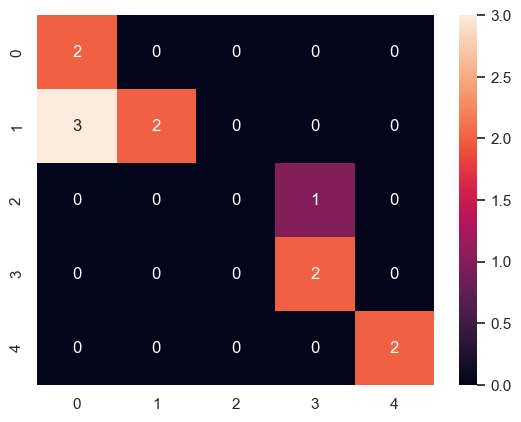

In [123]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        2018       0.50      1.00      0.67         2
        2019       1.00      0.60      0.75         5
        2020       0.00      0.00      0.00         1
        2021       0.67      1.00      0.80         2
        2022       1.00      1.00      1.00         2

    accuracy                           0.75        12
   macro avg       0.63      0.72      0.64        12
weighted avg       0.78      0.75      0.72        12



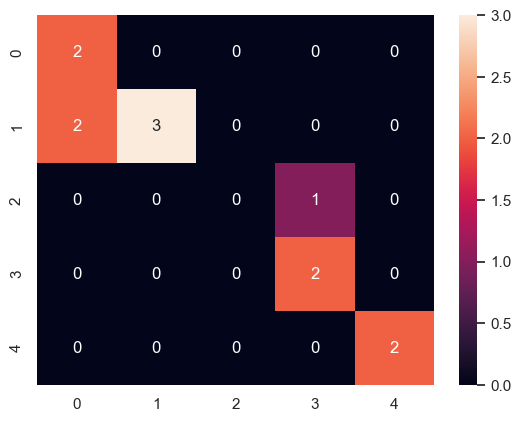

In [124]:
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(X_train.astype(float))
X_test_scaled = n_scaler.transform(X_test.astype(float))

from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.200 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.200 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.222 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.222 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.200 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.200 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.222 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.222 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

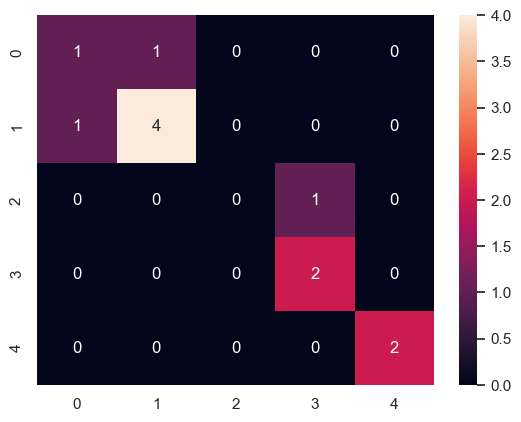

In [125]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train_scaled,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test_scaled)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

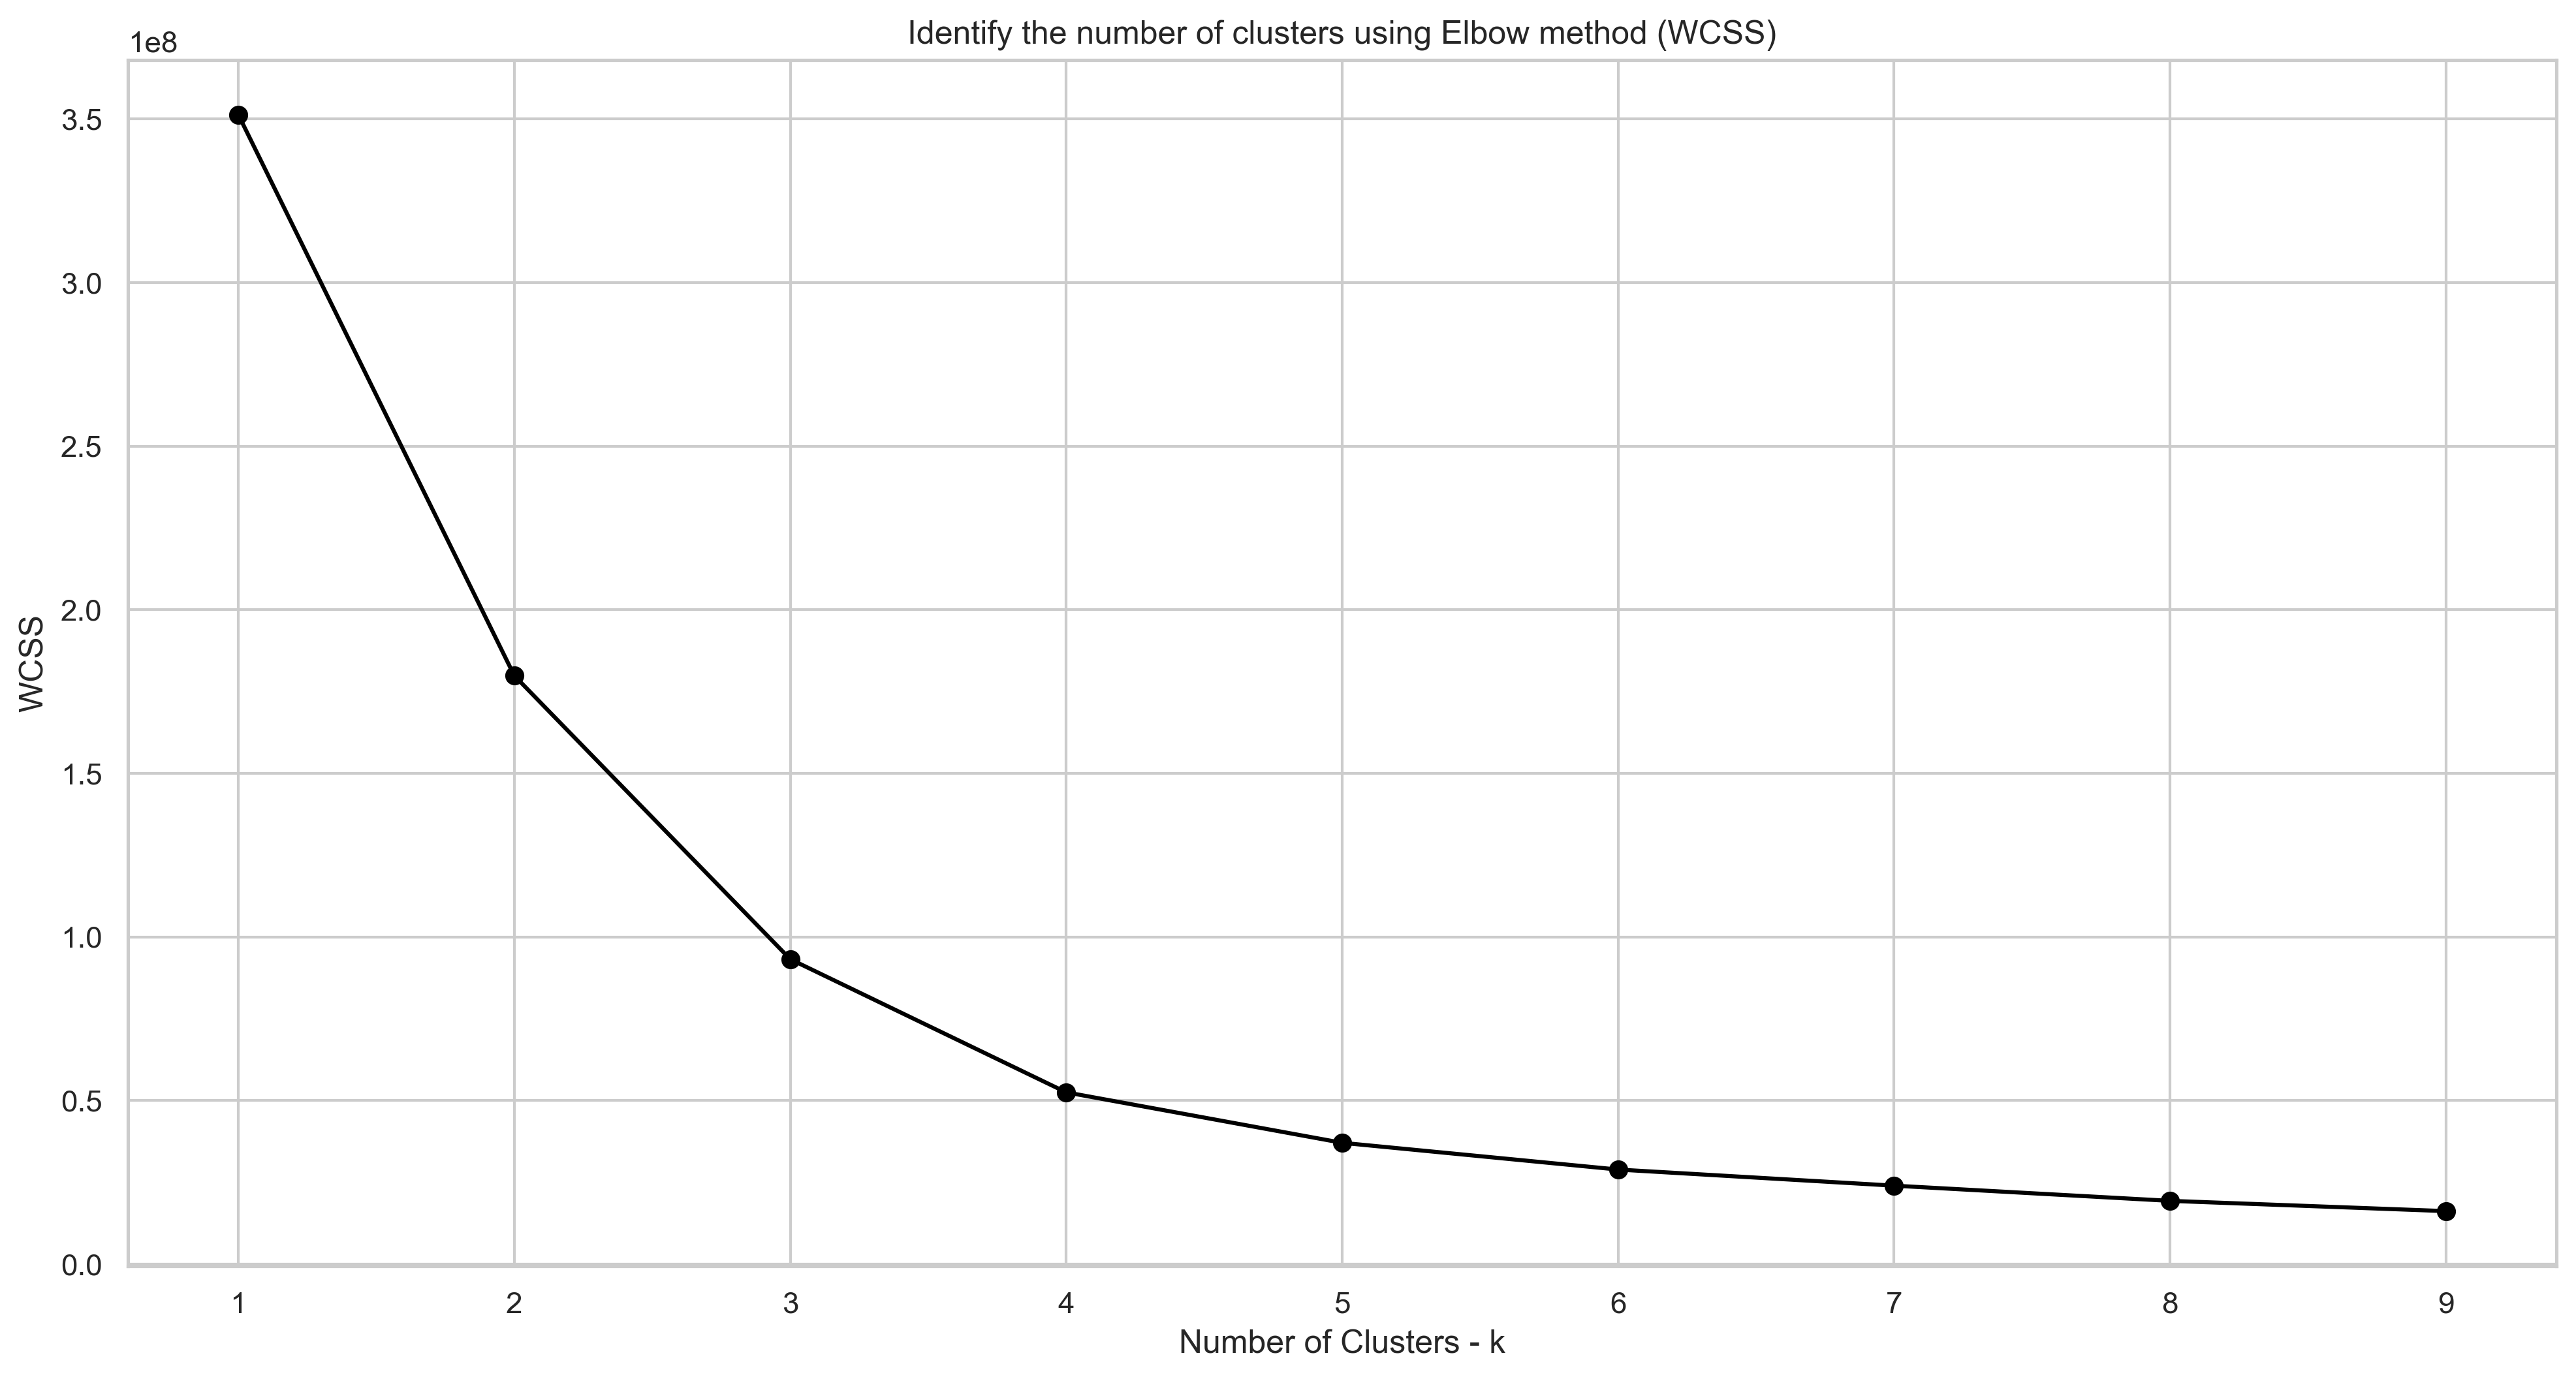

In [126]:
#Elbow method was used to determine the ideal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



WCSS = []
K = range(1, 10)

for k in K:
    kmod = KMeans(n_clusters=k)
    kmod.fit(transport_df[['Passengers Luas', 'Passengers Tren', 'Revenue Tren']])
    WCSS.append(kmod.inertia_)


plt.figure(figsize=(16, 8), dpi=300)
plt.plot(K, WCSS, 'bo-', color='black')
plt.xlabel('Number of Clusters - k')
plt.ylabel('WCSS')
plt.title('Identify the number of clusters using Elbow method (WCSS)')
plt.show()

In [127]:
from sklearn.cluster import KMeans
import plotly.graph_objs as go

X = transport_df[['Passengers Luas', 'Passengers Tren', 'Revenue Tren']]

model3 = KMeans(n_clusters=3,
                init='k-means++', 
                n_init=10,  
                max_iter=100, 
               )


model4 = KMeans(n_clusters=4,
                init='k-means++', 
                n_init=10, 
                max_iter=100, 
               )


cluster3 = model3.fit_predict(X)
cluster4 = model4.fit_predict(X)




In [128]:
transport_df['Cluster3'] = cluster3
transport_df['Cluster4'] = cluster4

fig = go.Figure()


fig.add_trace(go.Scatter3d(
    x=transport_df['Passengers Luas'],
    y=transport_df['Passengers Tren'],
    z=transport_df['Revenue Tren'],
    mode='markers',
    marker=dict(
        color=cluster3,
        size=8,
        line=dict(
            color='black',
            width=0.5
        ),
        colorscale='Viridis',  
        colorbar=dict(title='Cluster')
    ),
    text=transport_df['Year'],
    name='3 Clusters'
))


fig.add_trace(go.Scatter3d(
    x=transport_df['Passengers Luas'],
    y=transport_df['Passengers Tren'],
    z=transport_df['Revenue Tren'],
    mode='markers',
    marker=dict(
        color=cluster4,
        size=8,
        line=dict(
            color='black',
            width=0.5
        ),
        colorscale='Viridis',  
        colorbar=dict(title='Cluster')
    ),
    text=transport_df['Year'],
    name='4 Clusters'
))

fig.update_layout(
    title='3D Scatter Plot of Clusters',
    scene=dict(
        xaxis=dict(title='Passengers Luas'),
        yaxis=dict(title='Passengers Tren'),
        zaxis=dict(title='Revenue Tren')
    )
)

fig.show()



## K-means clustering

In [129]:
# K-means clustering was applied with three and four clusters based on the variables Passengers Luas, 
#Passengers Tren and Revenue Tren.
X = transport_df[['Passengers Luas', 'Passengers Tren']]

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100)

kmeans.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=10)

In [130]:
print(transport_df.columns)

Index(['Year', 'Month', 'Passengers Luas', 'Passengers Tren', 'Revenue Tren',
       'Cluster3', 'Cluster4'],
      dtype='object')


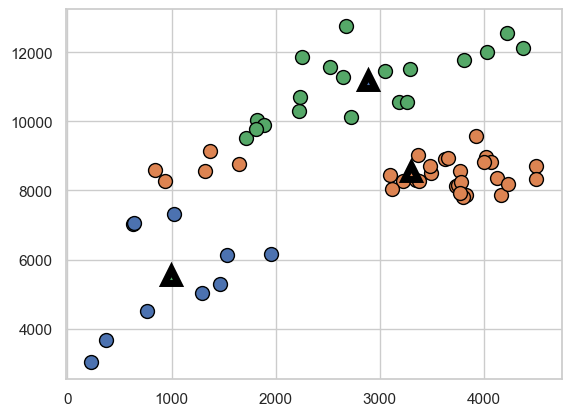

In [131]:
import matplotlib.pyplot as plt
import mglearn


mglearn.discrete_scatter(transport_df['Passengers Luas'], transport_df['Passengers Tren'], transport_df['Cluster3'], markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=5)



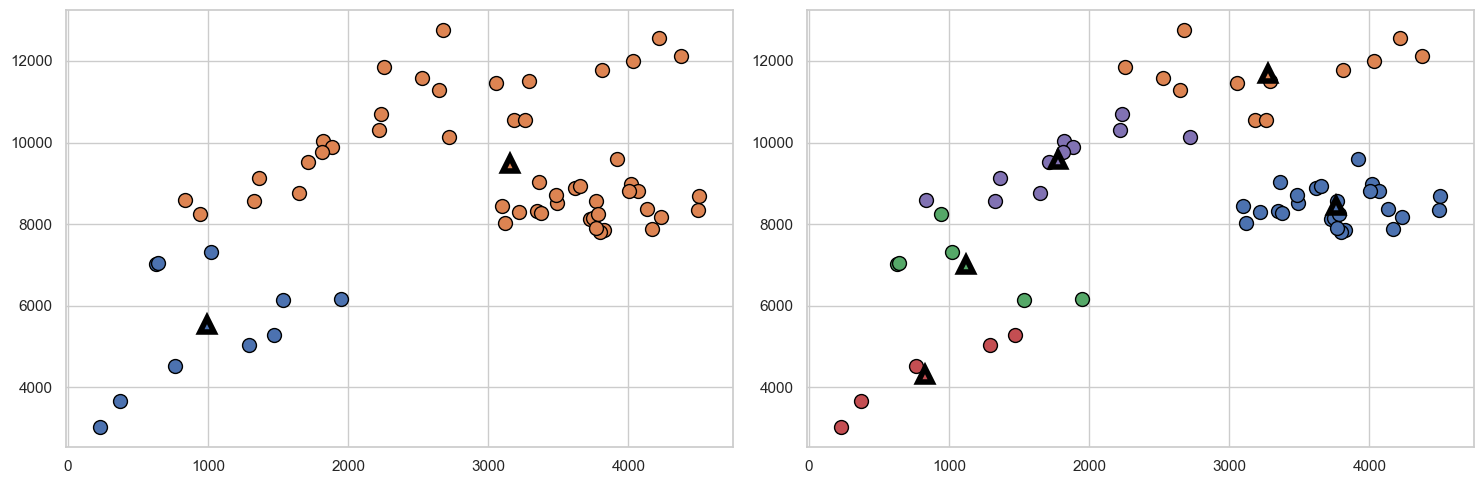

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Using two clusters centers
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(X)
assignments1 = kmeans1.labels_
centers1 = kmeans1.cluster_centers_

mglearn.discrete_scatter(transport_df['Passengers Luas'], transport_df['Passengers Tren'], assignments1, ax=axes[0], markers='o')
mglearn.discrete_scatter(centers1[:, 0], centers1[:, 1], [0, 1], ax=axes[0], markers='^', markeredgewidth=4)

# Using five clusters centers
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(X)
assignments2 = kmeans2.labels_
centers2 = kmeans2.cluster_centers_

mglearn.discrete_scatter(transport_df['Passengers Luas'], transport_df['Passengers Tren'], assignments2, ax=axes[1], markers='o')
mglearn.discrete_scatter(centers2[:, 0], centers2[:, 1], [0, 1, 2, 3, 4], ax=axes[1], markers='^', markeredgewidth=4)


plt.tight_layout()
plt.show()


In [133]:

from sklearn.metrics import silhouette_score





km = KMeans(n_clusters=3, random_state=42)


km.fit_predict(transport_df[['Passengers Luas', 'Passengers Tren', 'Revenue Tren']])


score = silhouette_score(transport_df[['Passengers Luas', 'Passengers Tren', 'Revenue Tren']], km.labels_, metric='euclidean')


print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.540



## Random Forest

In [134]:
from sklearn.model_selection import train_test_split

# Features (X)
X = transport_df[['Passengers Luas', 'Passengers Tren', 'Revenue Tren']]

# Target variable (y)
y = transport_df['Year']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test


## Generating the Model on Selected Features

In [135]:

# Random Forest classifier  was implemented to provide a foundation 
#for classification and the accuracy score to show its performance on our dataset.

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6111111111111112


## Finding Important Features in Scikit-learn

In [136]:

#This data provides a clear and. wasy to understand ranking of feature importances,
#allowing to identify the most important features in the machine learning model.
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_imp


Passengers Tren    0.346399
Passengers Luas    0.341513
Revenue Tren       0.312088
dtype: float64

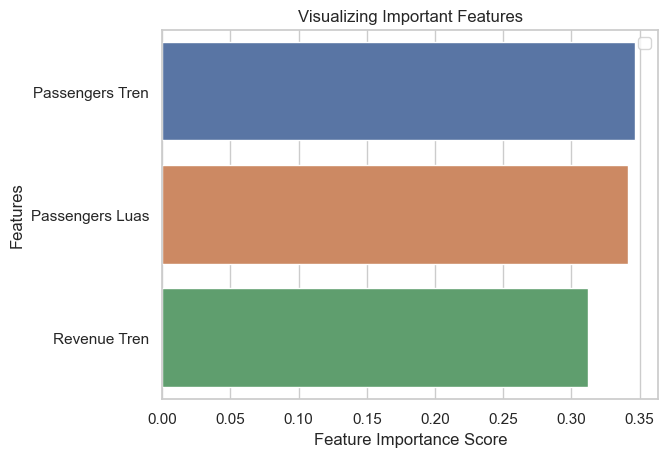

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [138]:
transport_df.head()

Year     Month  Passengers Luas  Passengers Tren  Revenue Tren  Cluster3  \
0  2018   January          3218.65           8287.8       2237.76         1   
1  2018  February          3118.29           8033.9       2128.95         1   
2  2018     March          3097.57           8441.4       2295.06         1   
3  2018     April          3350.06           8315.5       2410.74         1   
4  2018       May          3622.34           8899.0       2604.81         1   

   Cluster4  
0         2  
1         2  
2         2  
3         2  
4         2

Text(0.5, 1.0, 'Revenue Distribution by Cluster')

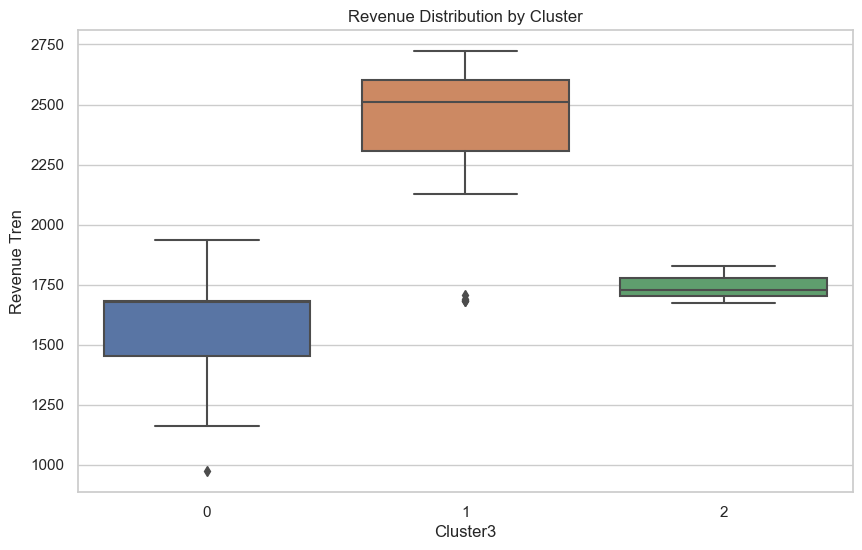

In [139]:
#this boxplot was created to efficiently communicate the distributional points about revenue within different clusters 

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster3', y='Revenue Tren', data=transport_df)
plt.title('Revenue Distribution by Cluster')



## Implement simple linear regression model

In [140]:
simple_data = transport_df[[ 'Passengers Tren', 'Revenue Tren']]
simple_data.head()

Passengers Tren  Revenue Tren
0           8287.8       2237.76
1           8033.9       2128.95
2           8441.4       2295.06
3           8315.5       2410.74
4           8899.0       2604.81

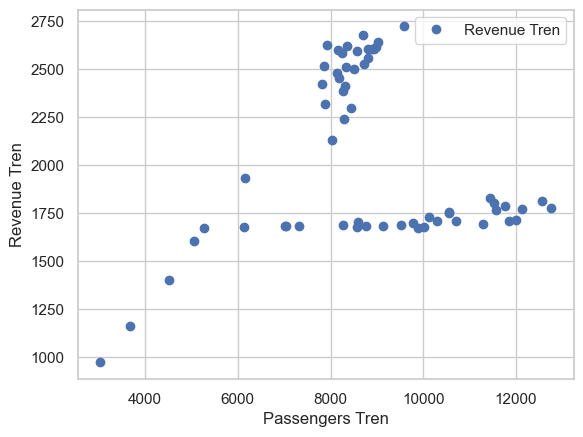

In [141]:
simple_data.plot(x='Passengers Tren', y='Revenue Tren', style='o')
plt.xlabel('Passengers Tren')
plt.ylabel('Revenue Tren')
plt.show()

<Axes: xlabel='Passengers Tren', ylabel='Revenue Tren'>

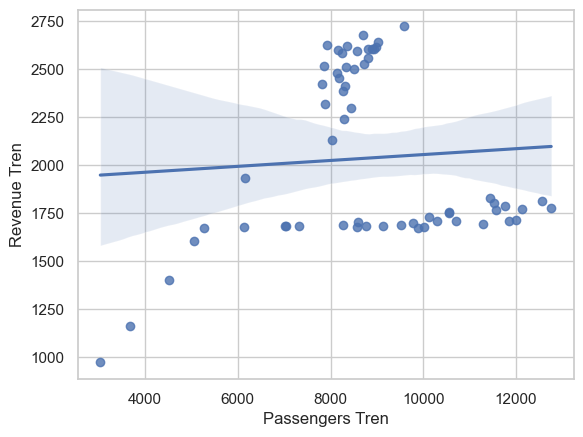

In [142]:
sns.regplot(x='Passengers Tren', y='Revenue Tren', data=simple_data)


In [143]:
x = simple_data[['Passengers Tren']]
y = simple_data['Revenue Tren']


## Spliting Data

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0 )
x_train.shape , x_test.shape, y_train.shape,y_test.shape

((42, 1), (18, 1), (42,), (18,))

## Train simple linear regression model

In [145]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)
predict = model.predict(x_test)

In [146]:
print('Best fit line has the intercept value of', model.intercept_)
print('Best fit line has the slope value of', model.coef_)

Best fit line has the intercept value of 2061.3335471791634
Best fit line has the slope value of [0.00100697]


In [147]:
#Actual and predicted value. This table was used to show straight forward the predicted and real/actual numbers
simple_compare = pd.DataFrame({"Predicted":predict , "Actual": y_test})
simple_compare.head(10)

Predicted   Actual
26  2067.536960  1933.81
35  2070.165241  1682.54
59  2073.416431  1712.49
28  2065.038879  1160.98
11  2069.966869  2595.47
2   2069.833748  2295.06
34  2068.715009  1681.90
58  2073.546531  1772.17
40  2070.537315  1685.57
22  2069.733051  2512.01

## Performance evaluation of simple linear regression

In [148]:
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Year             60 non-null     category
 1   Month            60 non-null     category
 2   Passengers Luas  60 non-null     float64 
 3   Passengers Tren  60 non-null     float64 
 4   Revenue Tren     60 non-null     float64 
 5   Cluster3         60 non-null     int32   
 6   Cluster4         60 non-null     int32   
dtypes: category(2), float64(3), int32(2)
memory usage: 3.1 KB


In [149]:
transport_df['Cluster3'] = transport_df['Cluster3'].astype('category')
transport_df['Cluster4'] = transport_df['Cluster4'].astype('category')

## Chi-squared test

In [150]:
# Chi squared was used to determine significant association between the variables
import scipy.stats as stats

transport_table = pd.crosstab(transport_df['Cluster3'], transport_df['Cluster4'])

val = stats.chi2_contingency(transport_table)
val

Chi2ContingencyResult(statistic=92.43378607809846, pvalue=9.454051329167901e-18, dof=6, expected_freq=array([[ 2.        ,  2.5       ,  4.33333333,  1.16666667],
       [ 6.2       ,  7.75      , 13.43333333,  3.61666667],
       [ 3.8       ,  4.75      ,  8.23333333,  2.21666667]]))

In [151]:
#This dashboard was created using Plotly Express to provide or generate a viasual appealing since it is
#interactive and more attractive for people who see it and easier to understand the insights of this project.

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Tren Dashboard"),

    dcc.Graph(id='scatter-plot'),

    html.Label([
        "Select Cluster",
        dcc.Dropdown(
            id='cluster-dropdown', clearable=False,
            value='Cluster3', options=[
                {'label': c, 'value': c}
                for c in ['Cluster3', 'Cluster4']
            ])
    ]),
])

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input("cluster-dropdown", "value")]
)
def update_scatter_plot(selected_cluster):
    return px.scatter(
        transport_df, x="Passengers Tren", y="Revenue Tren",
        color=selected_cluster, title="Scatter Plot",
        render_mode="webgl"
    )

app.run_server(mode='inline')